<a href="https://colab.research.google.com/github/kp10x/ML-Lab/blob/main/EM_vs_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EM vs K-Means

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn import preprocessing

## K-Means

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
72            6.3          2.5           4.9          1.5
88            5.6          3.0           4.1          1.3
58            6.6          2.9           4.6          1.3
113           5.7          2.5           5.0          2.0
64            5.6          2.9           3.6          1.3
15            5.7          4.4           1.5          0.4
102           7.1          3.0           5.9          2.1
28            5.2          3.4           1.4          0.2
1             4.9          3.0           1.4          0.2
29            4.7          3.2           1.6          0.2
The accuracy score of K-Mean:  0.8933333333333333


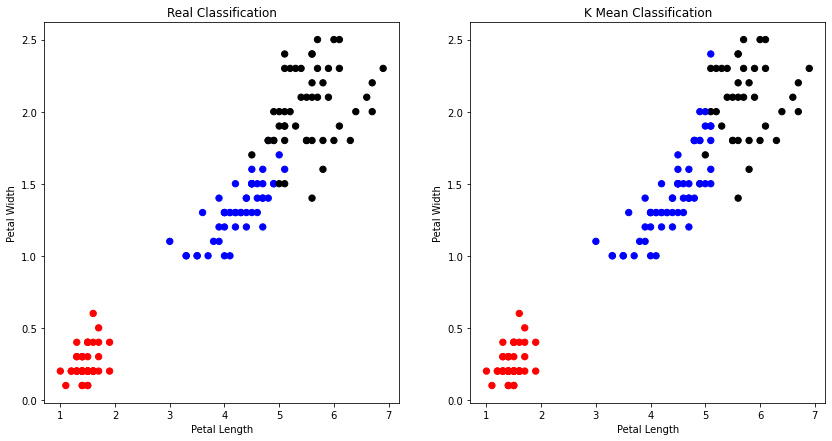

In [4]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
print(X.sample(10))
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)


plt.figure(figsize=(14,7))

colormap = np.array(['red', 'blue', 'black','magenta'])

plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))

## EM

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
5       -0.537178     1.939791     -1.169714    -1.052180
112      1.159173    -0.131979      0.990108     1.185567
3       -1.506521     0.098217     -1.283389    -1.315444
145      1.038005    -0.131979      0.819596     1.448832
129      1.643844    -0.131979      1.160620     0.527406
92      -0.052506    -1.052767      0.137547     0.000878
53      -0.416010    -1.743357      0.137547     0.132510
104      0.795669    -0.131979      1.160620     1.317199
122      2.249683    -0.592373      1.672157     1.053935
14      -0.052506     2.169988     -1.453901    -1.315444
The accuracy score of EM:  0.0


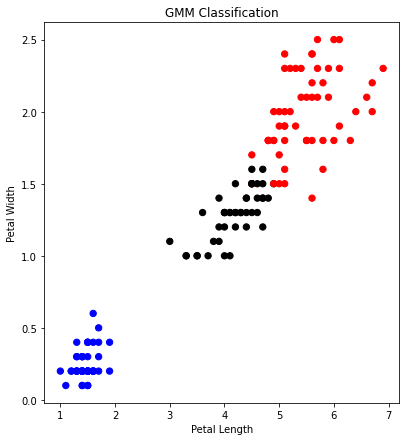

In [5]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
print(xs.sample(10))
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))